In [24]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "house-prices-advanced-regression-techniques"

# Import Data
The data set used for this practice and learning is House Sales Price on https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [25]:
df = read.csv('../input/house-prices-advanced-regression-techniques/train.csv')
head(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [26]:
missing.values <- df %>%
    gather(key = "key", value = "val") %>%
    mutate(is.missing = is.na(val)) %>%
    group_by(key, is.missing) %>%
    summarise(num.missing = n()) %>%
    filter(is.missing==T) %>%
    select(-is.missing) %>%
    arrange(desc(num.missing)) 

`summarise()` has grouped output by 'key'. You can override using the `.groups` argument.



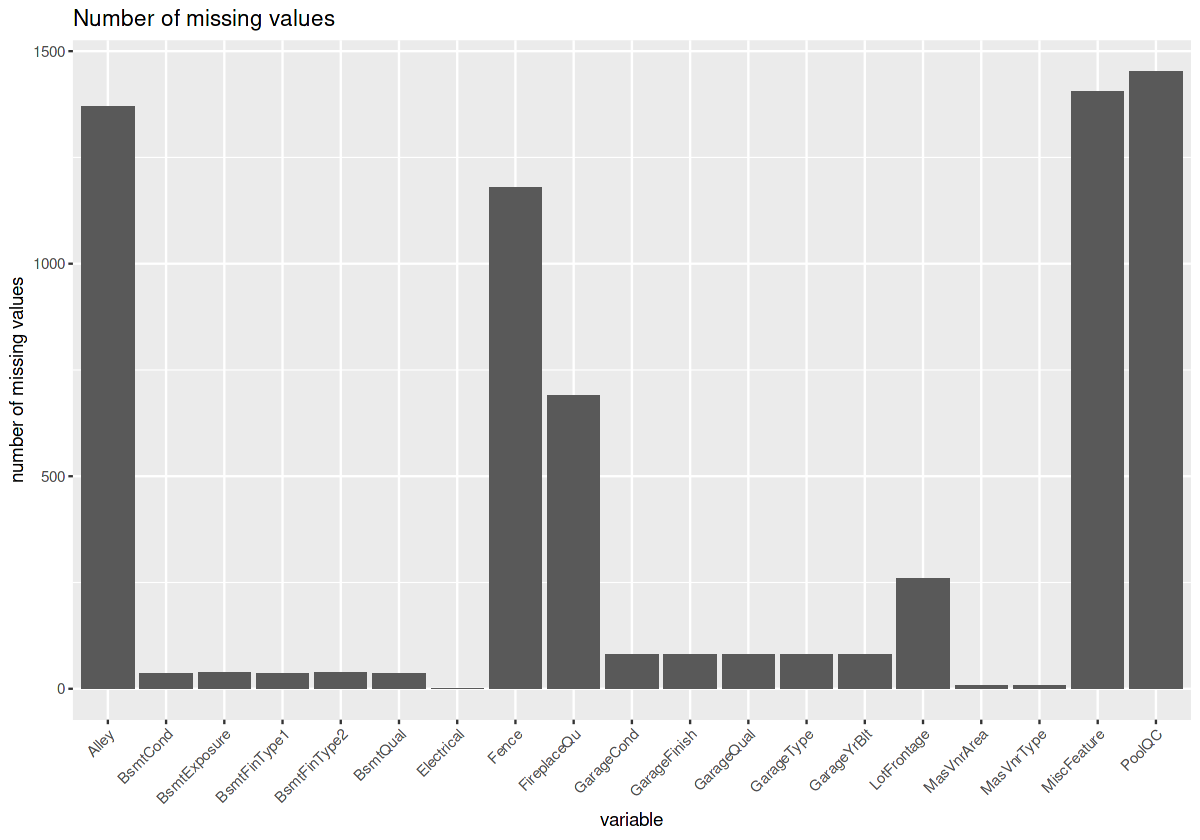

In [27]:
options(repr.plot.width = 10, repr.plot.height = 7)
missing.values %>%
    ggplot() +
    geom_bar(aes(x=key, y=num.missing), stat = 'identity') +
    labs(x='variable', y="number of missing values", title='Number of missing values') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

Before we're through the data, first im gonna check if there's missing value on the dataset.
Here's the following missing value with 19 columns has a missing value,
with there's 5 variable has more than 50% of the missing value, for the cleansing later

# Initial EDA

In [28]:
glimpse(df)

Rows: 1,460
Columns: 81
$ Id            <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ MSSubClass    <int> 60, 20, 60, 70, 60, 50, 20, 60, 50, 190, 20, 60, 20, 20,…
$ MSZoning      <chr> "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RM", "R…
$ LotFrontage   <int> 65, 80, 68, 60, 84, 85, 75, NA, 51, 50, 70, 85, NA, 91, …
$ LotArea       <int> 8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 612…
$ Street        <chr> "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", …
$ Alley         <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ LotShape      <chr> "Reg", "Reg", "IR1", "IR1", "IR1", "IR1", "Reg", "IR1", …
$ LandContour   <chr> "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", …
$ Utilities     <chr> "AllPub", "AllPub", "AllPub", "AllPub", "AllPub", "AllPu…
$ LotConfig     <chr> "Inside", "FR2", "Inside", "Corner", "FR2", "Inside", "I…
$ LandSlope     <chr> "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", …
$ Neighborhood  

this is the first initial EDA :
- there's 1,460 rows of data with 81 columns
- data consist of only String and Integer values
- with the target of variable is `SalePrice` which are the dependent variable

# 1. Start with the target `SalePrice` 

Statistic `SalePrice`

In [29]:
df$SalePrice %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  129975  163000  180921  214000  755000 

- the mean sale is on 180k
- the highest sale on 755k
- the cheapest sale on 34k
- not normally distribute

Histogram `SalePrice`

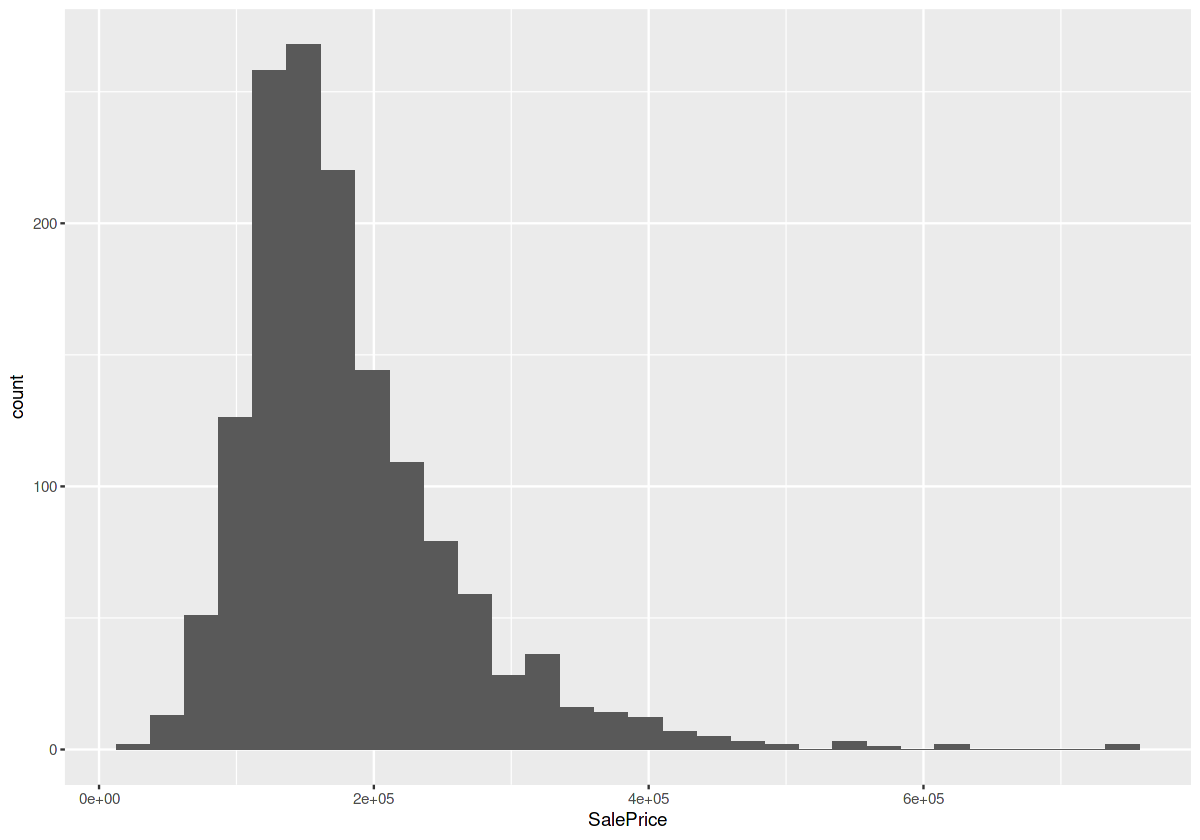

In [30]:
options(repr.plot.width = 10, repr.plot.height = 7)
df %>%
    ggplot(aes(x=SalePrice))+
    geom_histogram(bins = 30)

is a positive skew distribution

Boxplot `SalePrice`

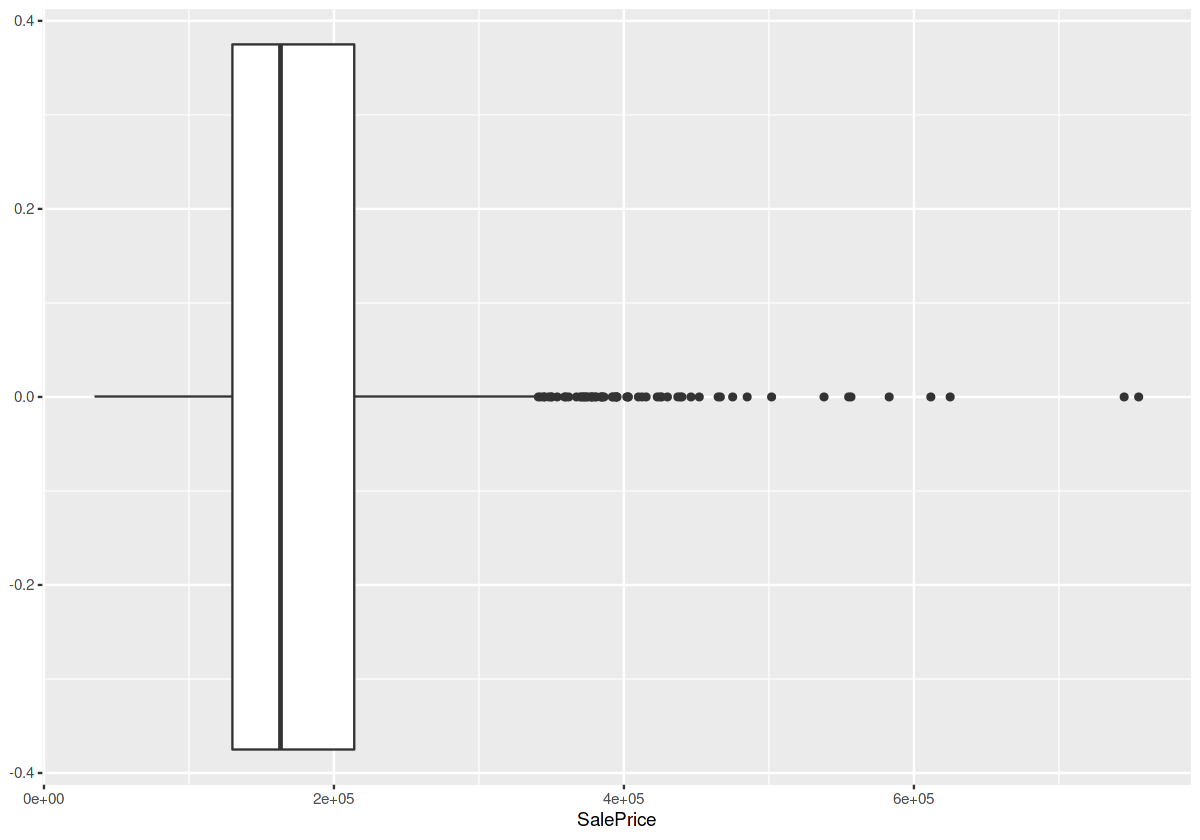

In [31]:
df %>%
    ggplot(aes(x=SalePrice))+
    geom_boxplot()

- there's an outlier on the data , with 2 outlier that beyond than the other

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



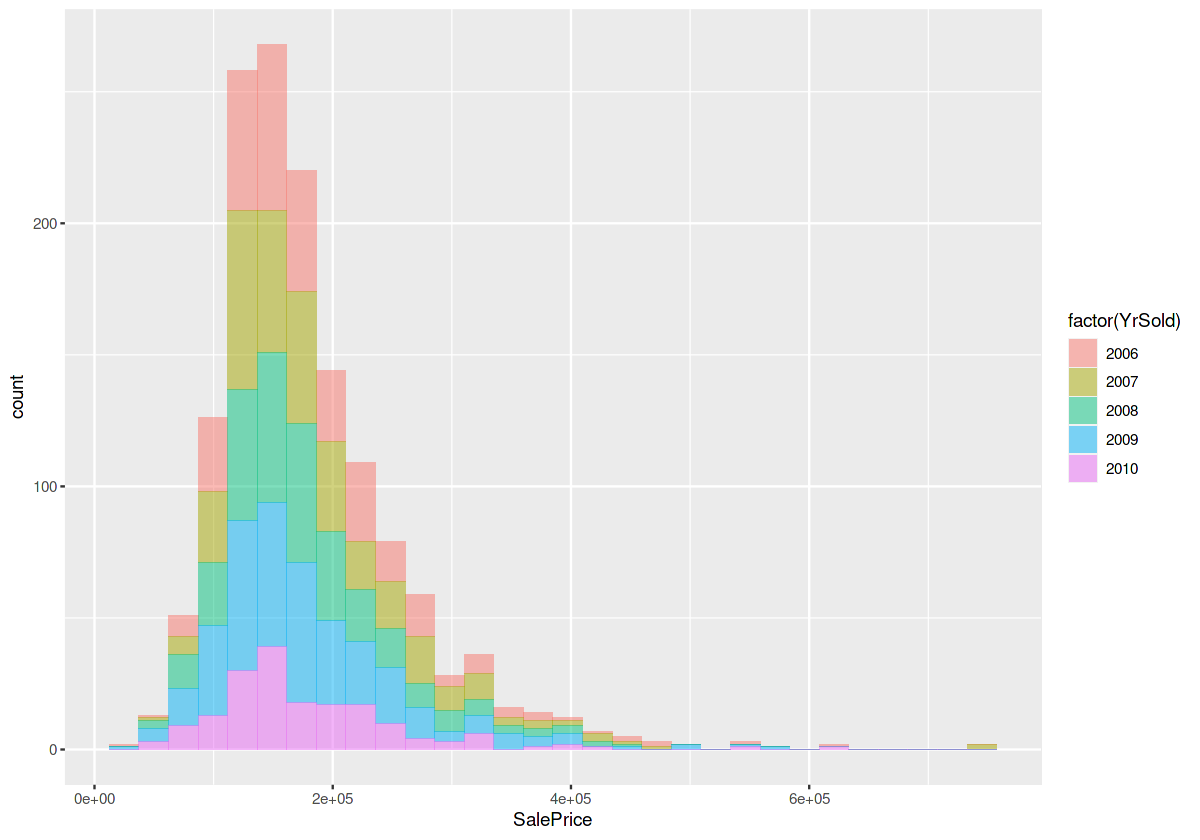

In [32]:
df %>%
  ggplot(aes(x = SalePrice)) +
  geom_histogram(aes(fill = factor(YrSold)), alpha = 0.5)

before move'on on to the next, i want to know the House SalePrice Through the years
and as i can see, the house sales at the peak at 2006 and slightly slope over the years until 2010.
it is because Financial Crisis that start on 2007

# 2. Correlations

after do the univariant analysis with the target variable and get the insight.
lets check the target variable correlation with other

# Heatmap

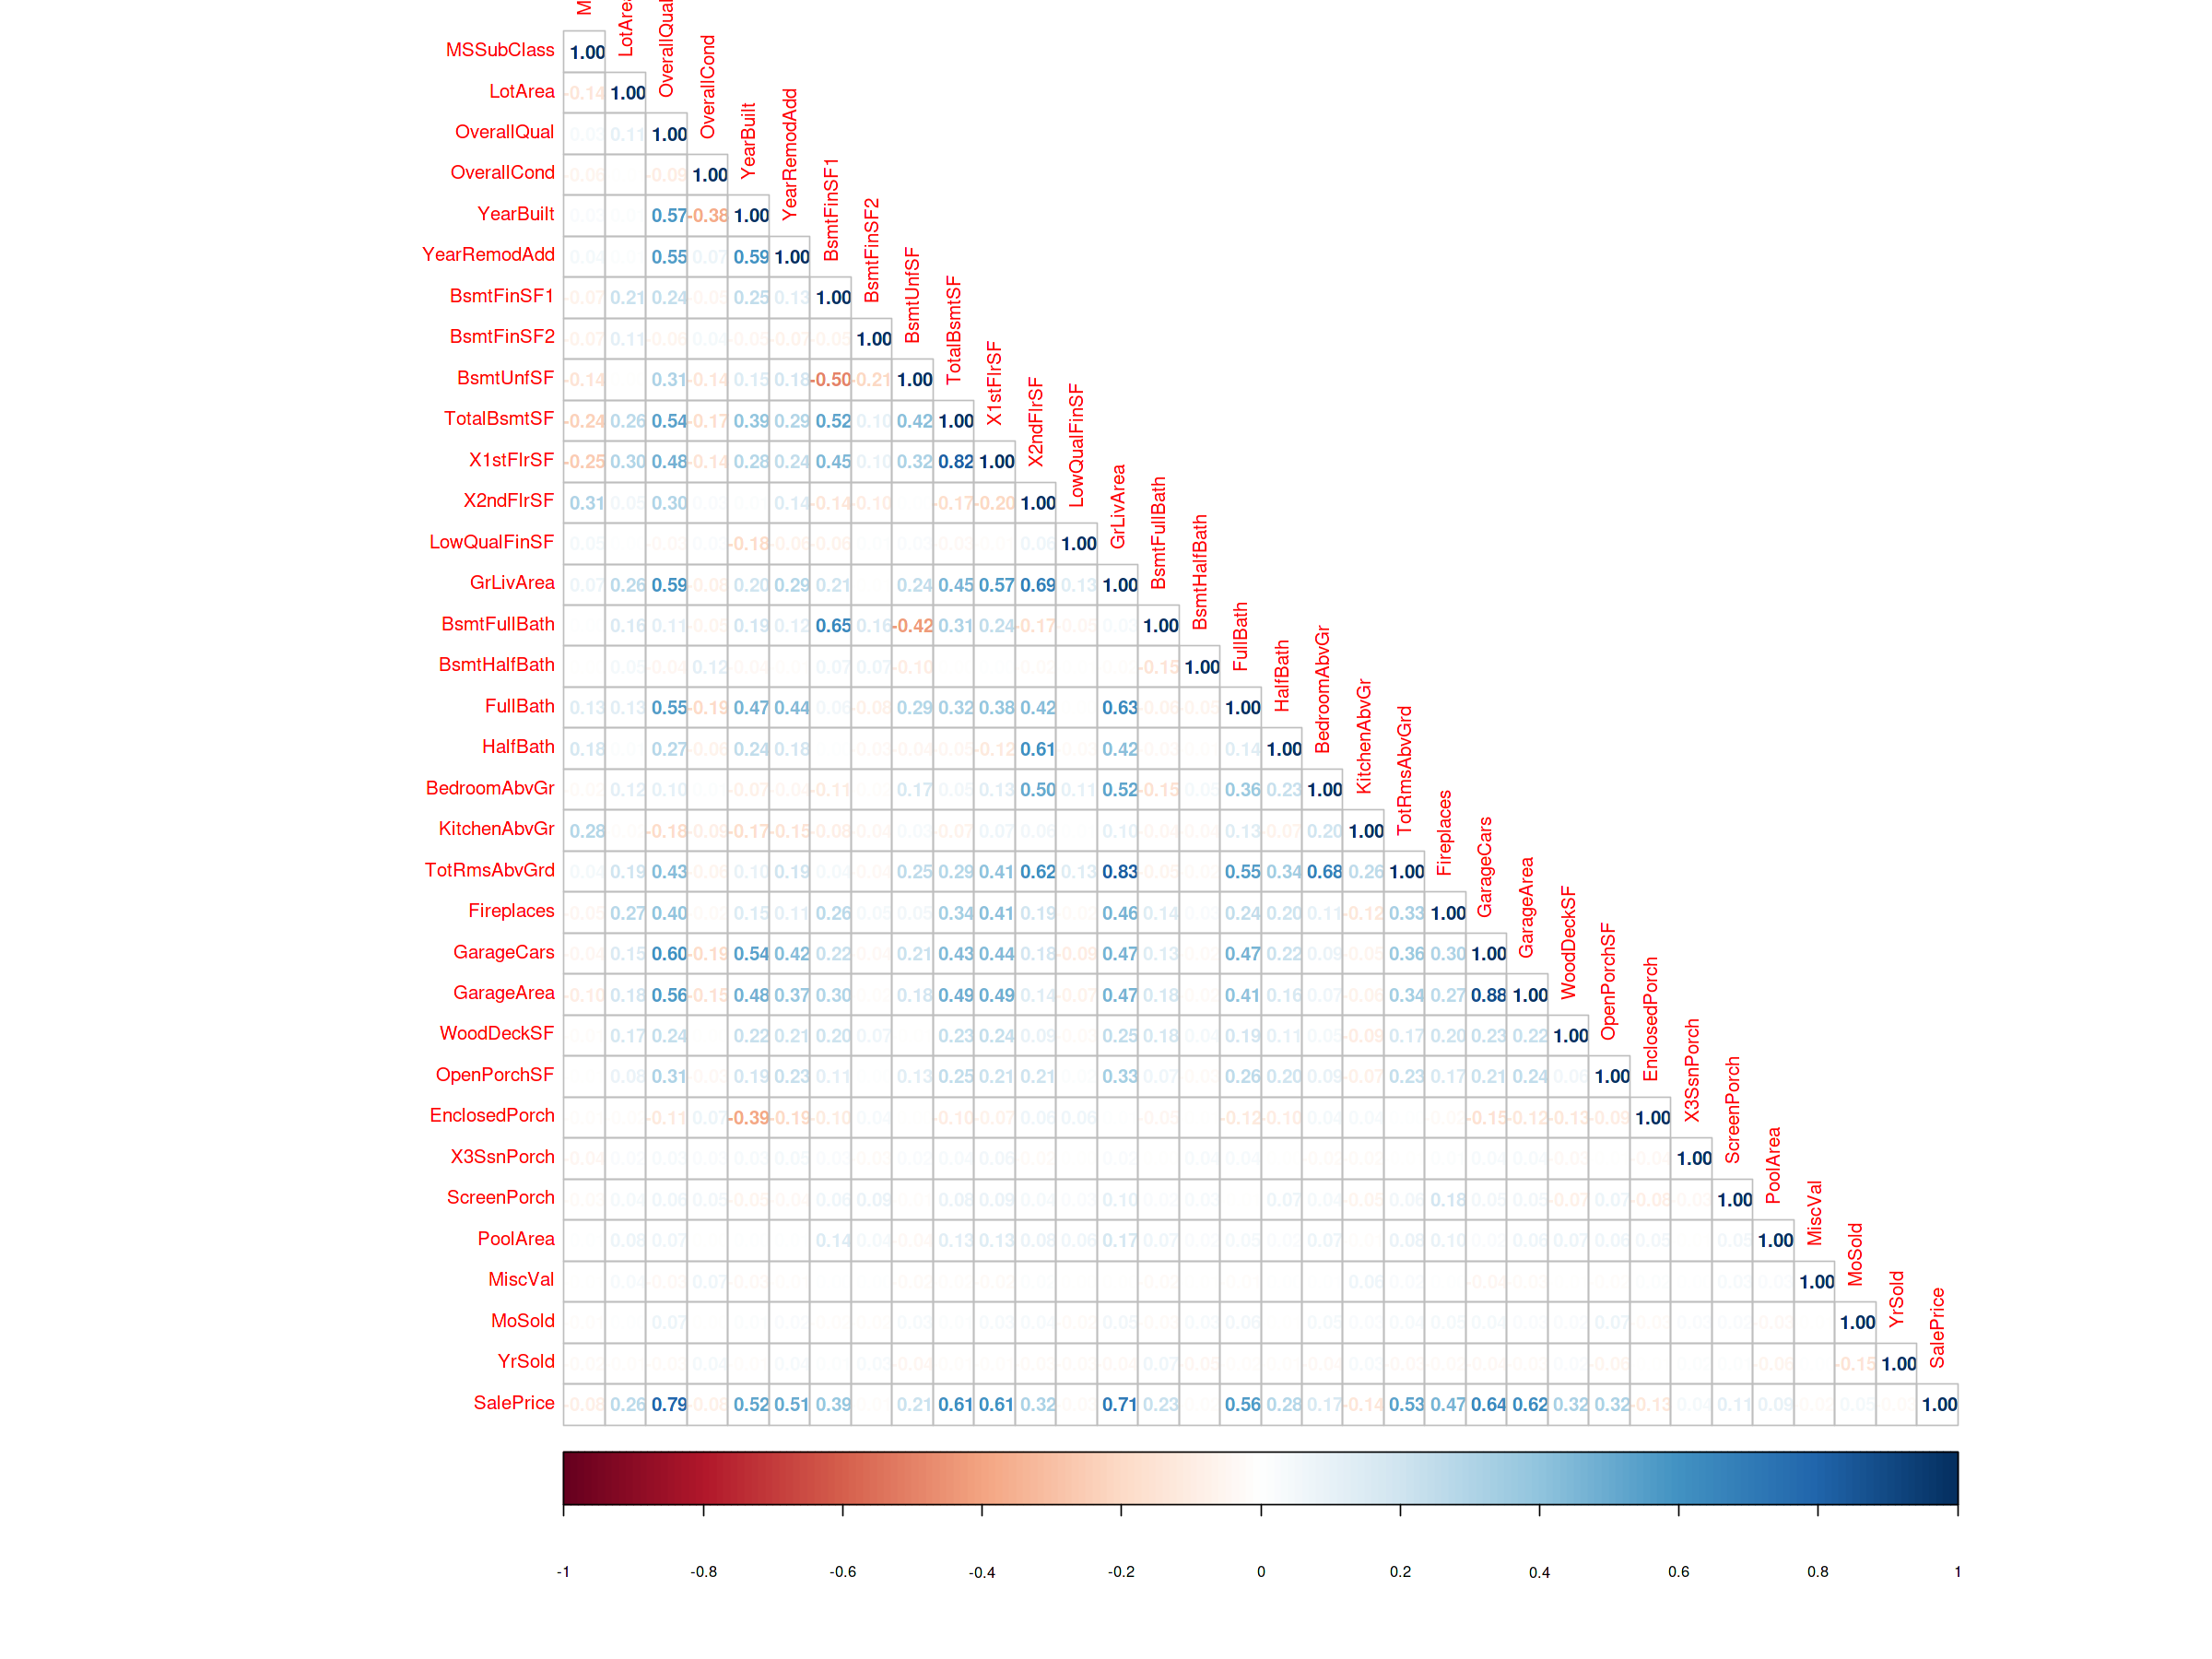

In [33]:
options(repr.plot.width = 20, repr.plot.height = 15)
df %>% select(-Id,-LotFrontage,-MasVnrArea,-GarageYrBlt) %>%
  select_if(is.numeric) %>% cor() %>% corrplot::corrplot(type='lower',method = 'number')

from the heat map above , we clearly can see that there's 5 variable that had a strong correlation with the variable target : 
1. OveraalQuall = 0.79
2. GrLivArea = 0.71
3. GarageCars = 0.64
4. GarageArea = 0.62
5. 1stFlrSF = 0.61

from this variable shows has effect for the SalePrice, such as the quality, house area as well as other

# 3. Relationship target Variable

as you know if the quality is low so the price is, and vice versa, oke than lets see whats the visual show us
The corresponding variable is OverallQual which values consist of :
- 10 = Very Excellent
- 9 = Excellent
- 8 = Very Good
- 7 = Good
- 6= =  Average
- 5 = Average
- 4 = Below Average
- 3 = Fair
- 2 = Poor
- 1 = Very Poor

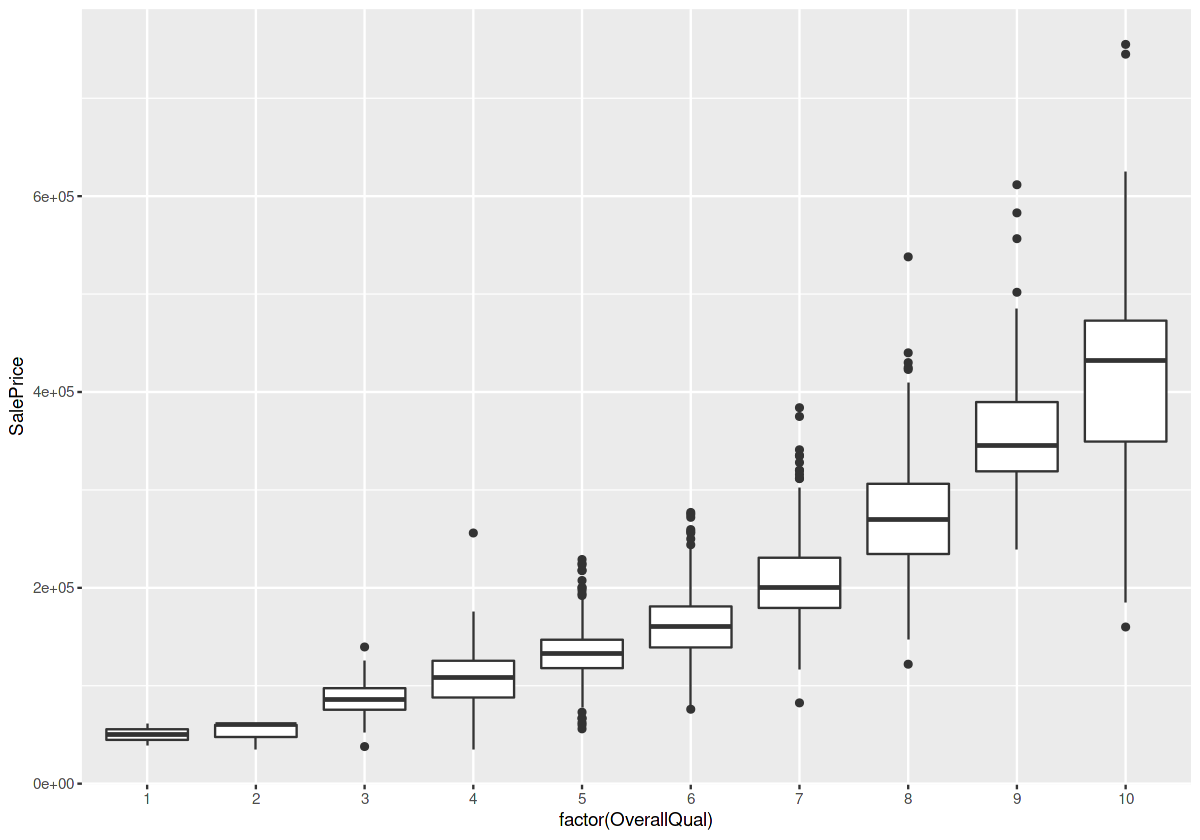

In [34]:
options(repr.plot.width = 10, repr.plot.height = 7)
df %>% 
ggplot(aes(x=factor(OverallQual),y=SalePrice)) + geom_boxplot()

`geom_smooth()` using formula 'y ~ x'



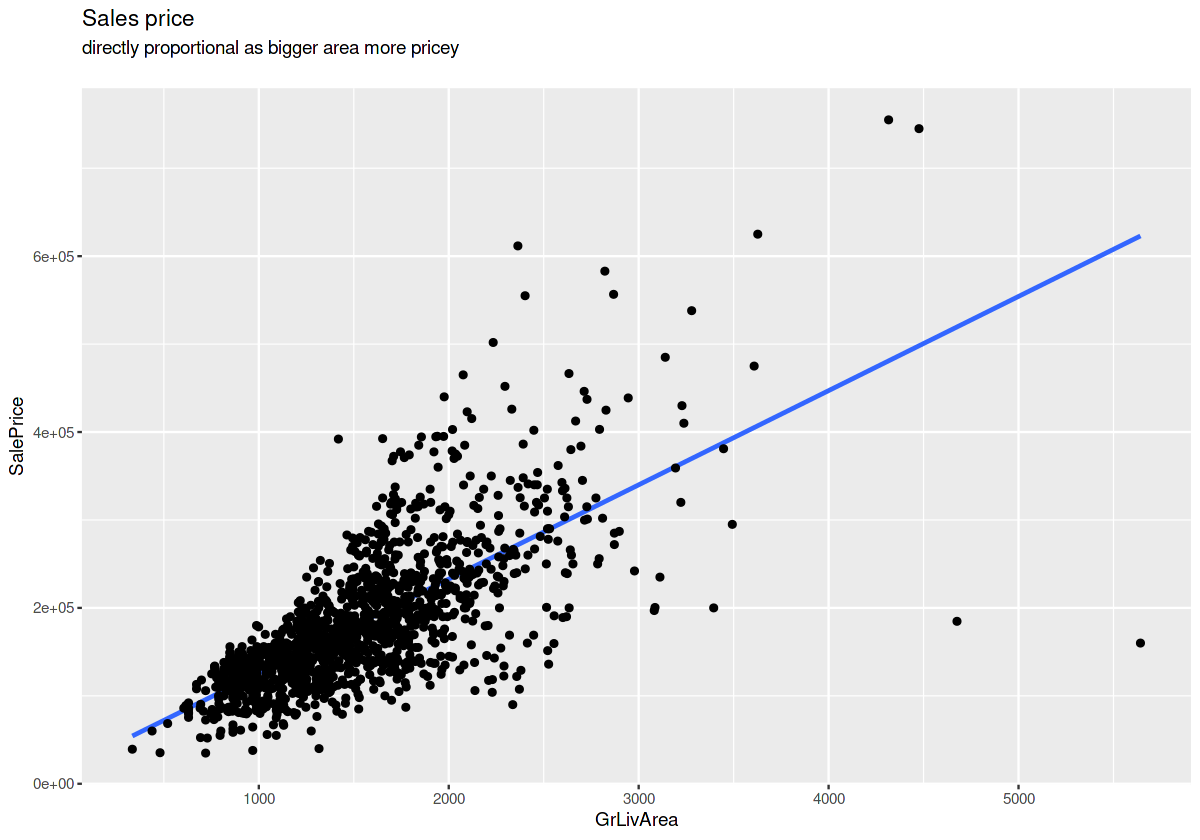

In [35]:
df %>%
  ggplot(aes(x = GrLivArea, y = SalePrice)) +
  geom_smooth(method='lm', se=FALSE)+
  labs(title = 'Sales price', subtitle = 'directly proportional as bigger area more pricey \n')+
  geom_point()

`geom_smooth()` using formula 'y ~ x'



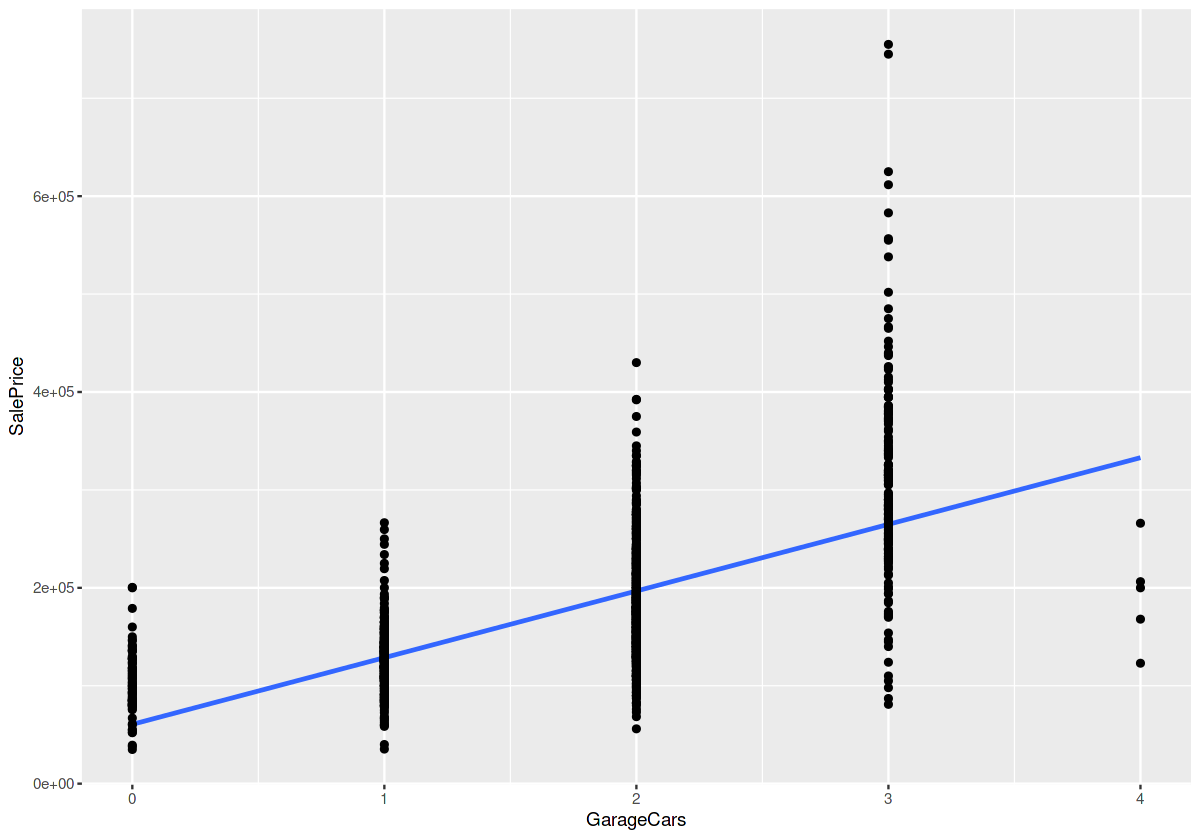

In [36]:
df %>%
  ggplot(aes(x = GarageCars, y = SalePrice)) +
  geom_smooth(method='lm', se=FALSE)+
  geom_point()

`geom_smooth()` using formula 'y ~ x'



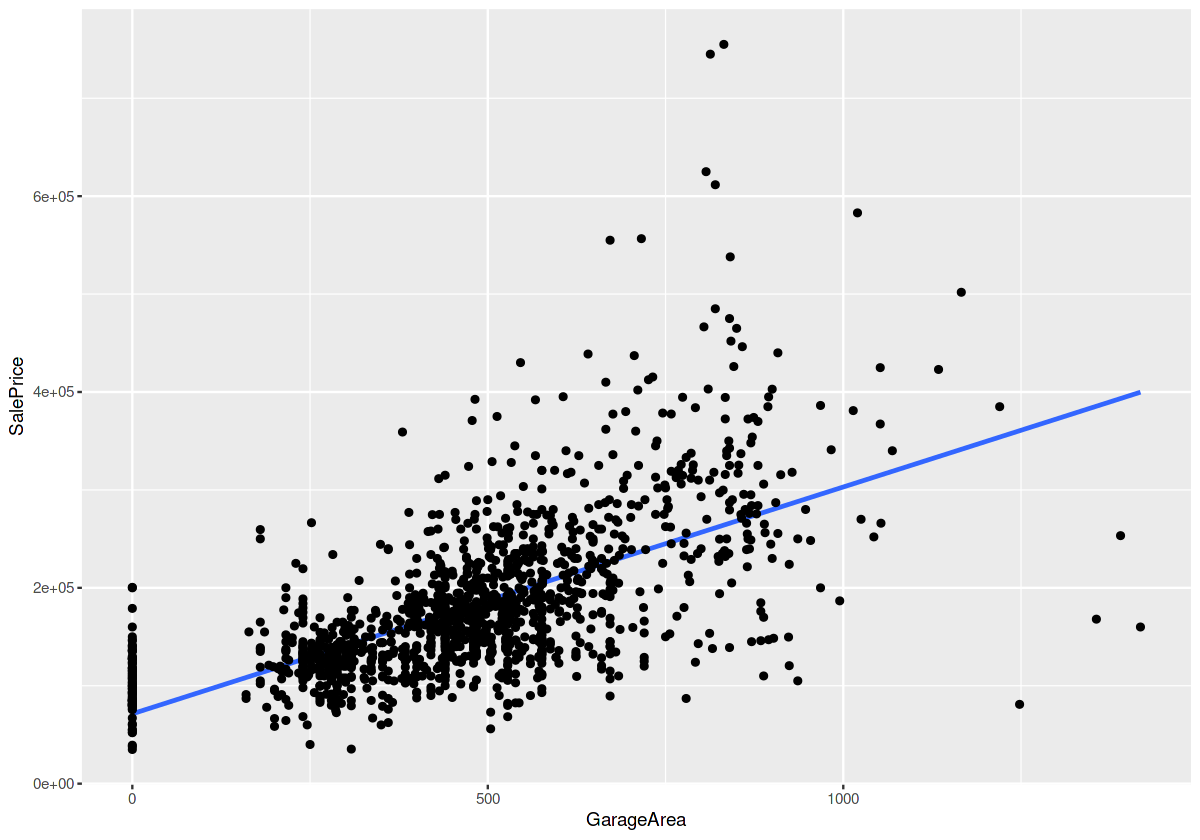

In [37]:
df %>%
  ggplot(aes(x = GarageArea, y = SalePrice)) +
  geom_smooth(method='lm', se=FALSE)+
  geom_point()

`geom_smooth()` using formula 'y ~ x'



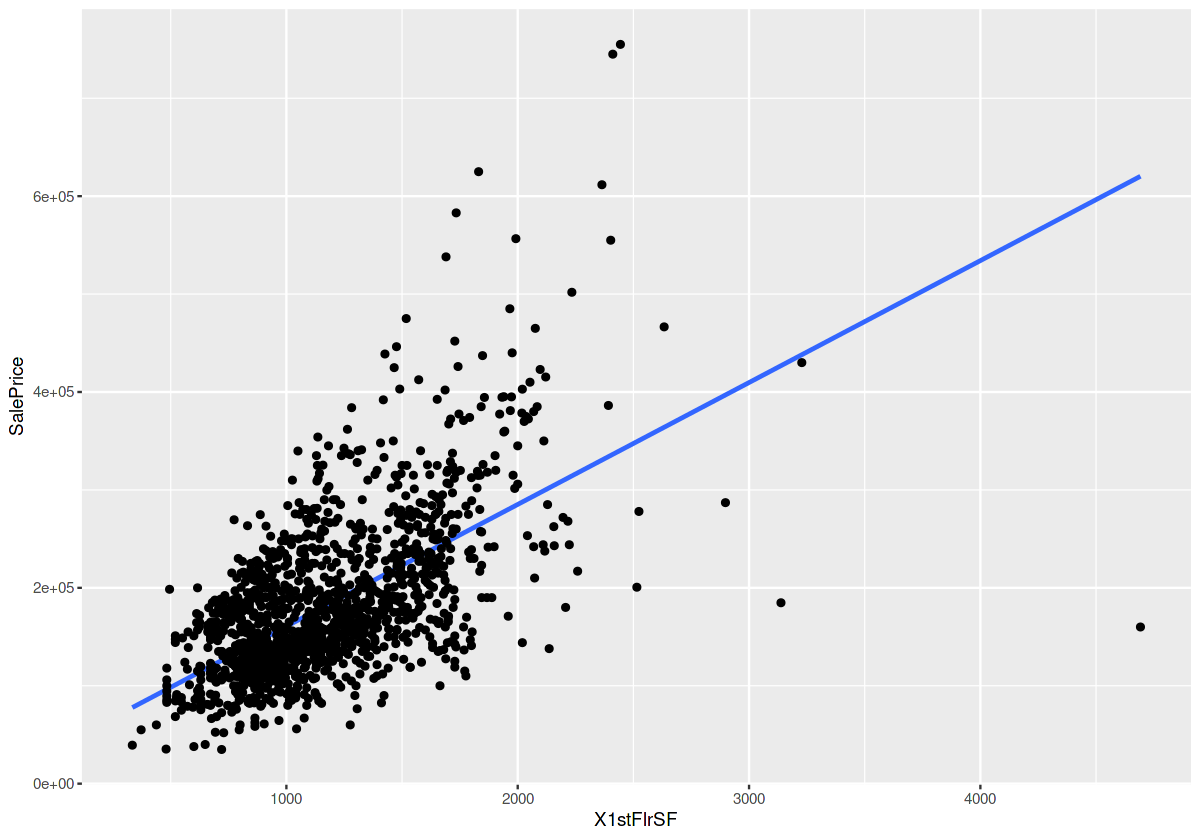

In [38]:
df %>%
  ggplot(aes(x = X1stFlrSF, y = SalePrice)) +
  geom_smooth(method='lm', se=FALSE)+
  geom_point()

According to the heatmap there are the graph SalePrice with several strong correlation
1. basically the graph say the truth the higher the quality, more pricey it is
2. in this graph GrlivArea there 2 anomalies/outlier. with the house area more than 4k square feet
   but it sales under 200k , what happend? is there any particular reason the owner sell it under the market ?
3. For the GarageCars and GarageArea its just the same like a twin.
4. and 1stFlrSF slightly same with the GrlivArea

# 4. Feature Engineering

In [39]:
df2 = df %>% 
  mutate(age_after_remodAdd = 2021 - YearRemodAdd,                            
         age_built_to_remodAdd = YearRemodAdd - YearBuilt,                    
         age_sell = YrSold - YearBuilt,                                        
         age_sell_to_month = age_sell * 12,                                  
         OQ_redefine = case_when(OverallQual <= 4 ~ "low",                     
                        OverallQual > 4 & OverallQual < 8  ~ "medium", 
                        OverallQual >= 8 ~ "high"),
         MS_redefine = case_when(MoSold <= 6 ~ "Awal Tahun",                   
                        MoSold > 6 ~ "Akhir Tahun"),
         HouseType = case_when(YearBuilt >= 1800 & YearBuilt <= 1950 ~ "Antique", 
                     YearBuilt >= 1951 & YearBuilt <= 2007 ~ "Recent",
                     YearBuilt > 2008 ~ "Modern"),
         quartal = case_when(MoSold <= 3 ~ "Quartal 1",                  
                        MoSold > 3 & MoSold <= 6  ~ "Quartal 2",
                        MoSold > 6 & MoSold <= 9  ~ "Quartal 3",
                        MoSold > 9 ~ "Quartal 4"))

Make a new columns  usia_after_remodAdd, usia_built_to_remodAdd, usia_jual, usia_jual_to_month, OQ_redefine, MS_redefine, HouseType, quartal

In [40]:
df2 %>% 
  select(Id, age_after_remodAdd, age_built_to_remodAdd, age_sell, age_sell_to_month, OQ_redefine, MS_redefine, HouseType, quartal

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: df2 %>% 
2:   select(Id, age_after_remodAdd, age_built_to_remodAdd, age_sell, age_sell_to_month, OQ_redefine, MS_redefine, HouseType, quartal
  ^
